# Logistic Regression with Python

### Objectives

1. Use logistic regression for classification
2. Preprocess data for modeling
3. Implement logistic regression on real world data

## Whta is Logistic Regression?

Logistic regression is a statistical method used for **binary classifications** problems, where the goal is to predict one of two possible outcomes (e.g., yes/no, spam/not spam, pass/fail). It is a type of regression analysis but is used for classification rather than predicting continous values.

#### How it works?

1. Linear combination of Inputs - Logistic regression takes input features (X) and applies a weighted sum with coefficients like in linear regression
2. Sigmoid (logistic) function - To convert the linear output into a probability (0 to 1), we apply the sigmoid function

#### Types of Logistic Regression:
1. Binary logistic regression - Predicts two possible outcomes (e.g., spam or not spam)
2. Multinomial logistic regression - Predicts three or more unordered categories (e.g., predicting fruit type: apple, banana, or orange).
3. Ordinal logistic regression: Predicts three or more ordered categories (e.g., rating: low, medium, high)

#### Use Cases:
1. Spam detection (email is spam or not)
2. Medical Diagnosis (Disease present or not)
3. Credit card assessment (loan default or not)
4. Customer churn prediction

In [2]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Classification with Logistic Regression

#### Scenario

Assume that we are working for a telecommunications company which is concerned about no of customers leaving their land-line business for cable competitors. They need to understand who is likely to leave the company.

#### Load the telco Churn data

Telco churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and sevice usage information.

#### About the dataset

We will use a telecommunications dataset for prediucting customer churns. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and we may uncover insights that can be used immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This dataset provides us information about customer preferences, services opted, personal details, etc., which helps us predict customer churn.

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
df = pd.read_csv(url)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.head(100)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11.0,63.0,9.0,41.0,3.0,3.0,1.0,0.0,0.0,4.15,...,0.0,1.0,0.0,0.0,1.0,1.423,3.240,3.714,1.0,1.0
96,51.0,48.0,27.0,58.0,1.0,18.0,0.0,1.0,0.0,19.20,...,0.0,0.0,0.0,1.0,0.0,2.955,3.248,4.060,3.0,1.0
97,25.0,62.0,27.0,28.0,4.0,33.0,1.0,1.0,1.0,8.30,...,1.0,0.0,1.0,1.0,1.0,2.116,2.691,3.332,4.0,1.0
98,62.0,76.0,20.0,35.0,3.0,18.0,0.0,1.0,0.0,17.25,...,0.0,0.0,0.0,0.0,1.0,2.848,3.240,3.555,2.0,0.0


Let's select some features for the modelling. Also we change the target data type to an integer, as it is a requirement by the scikit-learn algorithm.

#### Data Preprocessing

For this project we can use a subset of the feilds available to develop or model. Let us assume that the featurs we will be using are 'tenure', 'age', 'adress', 'income', 'ed', 'employ', 'equip' and 'churn'.

In [5]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


For modeling input feilds X and the target feilds y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining feilds as the input. Store these values in the variable 'X'.

In [6]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This help the model learn faster and improves the model performance. 

In [8]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Splitting the data set

The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)

### Logistic Regression Classifier Modeling

Let's build the model using **LogisticRegression** from the scikit-learn package and fit our model with train data set.

In [10]:
LR = LogisticRegression().fit(X_train, y_train)

Fitting (or training) a model means teaching it to recognize patterns in the data. Imagine showing a student many examples of math problems and their solutions - over time, they learn how to solve similar problems on their own.

Similary, when we train a machine learning model, it learns from the training data. once, it's trained, we can use it for predictions on new, unseen data. In our case we trained a model to understand customer churn (wheather a customer will leave or stay). Now, we can use it to predict churn for new customers based on their data.

In [11]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

This predicted array represents the model's calssification results for the test dataset.

1. Each value in the array corresponds to a prediction for a data point in the test set.
2. '0' means the model predicts class 0 (eg, 'No Churn')
3. '1' means the model predicts class 1 (eg, 'churn')

Interpretation 

* The 2nd and 6th data points (index 1 and 5) are predicted as class 1 (Churn).
* The rest of the data points are predicted as class 0 (No Churn).

This means the model believes that only two customers in the test set are likely to churn, while the rest are likely to stay.

To better understand the model prediction's, we can look at the probability of each prediction using the `predict_prob` function.

This function tells us how confident the model is about each prediction. It gives two probability values for each data point in the test dataset:

1. First column - Probability of data point belonging to class 0
2. Second column - Probability of data point belonging to calss 1

Since the model uses the threshold of 0.5, it assigns the calss based on the higher probability. For example:

1. If the probability of class 1 is greater than 0.5, the model prdicts class 1.
2. Similarly, if the probability of calss 0 is greater than 0.5, the model predicts class 0.

 In short, the model chooses the calss that is most likely based on its learned patterns.

In [12]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.51878155, 0.48121845],
       [0.22539374, 0.77460626],
       [0.78053821, 0.21946179],
       [0.68476137, 0.31523863],
       [0.82116484, 0.17883516],
       [0.30994702, 0.69005298],
       [0.97893094, 0.02106906],
       [0.53468732, 0.46531268],
       [0.50226993, 0.49773007],
       [0.90300796, 0.09699204]])

The `predict_proba` output shows the probability estimates for each test data point belonging to calss 0 or 1.

Each row represnts a test sample and:
1. The first column gives the probability of class 0 (No churn)
2. The second column gives the probability of class 1 (Churn)
3. The predictionm is based on the higher probability, using a 0.5 threshold.

Prediction aligns with the highest probability - Foe ex, at index 1 `0.775 > 0.225`, so it predicts 1 (churn), at index 6 `0.979 > 0.021`, so it predicts 0 (No Churn).

If we want to fine tune this, we can adjust the threshold from 0.5 to something else (e.g., 0.6 or 0.4) depending on the business needs.

To better predict Class 1 (churn) accurately, we need to analyze the contribution of each input feature to the model's decision-making process. One common way to do this is through feature importance (for tree-based) or coefficients (for linear models), here let's use coefficients. 

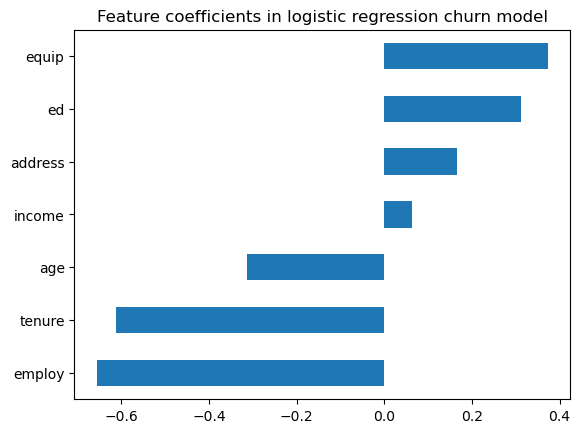

In [13]:
coefficients = pd.Series(LR.coef_[0], index = df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title('Feature coefficients in logistic regression churn model')
plt.show()

### Performance evaluation

Once the predictions have been genereated, it becomes prudent to evaluate the performance of thye model in predicting the target variable. Let us evaluate the log-loss value.

**Log loss**

Log loss (logorithmic loss), also known as Binary cross entropy loss, is a function thta generates a loss value based on the class wise prediction probabilities and the actujal calss labels. The lower the loss value the better the model is considered to be.

In [14]:
log_loss(y_test, yhat_prob)

0.4068959657047867

Let's add tyhe feature 'callcard' to the original set of input feaatures, and calculate the log loss

In [17]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
df = pd.read_csv(url)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [39]:
df_1 = df[['tenure', 'callcard', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df_1['churn'] = df_1['churn'].astype('int')

In [40]:
X_1 = np.asarray(df_1[['tenure', 'callcard', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']])
y_1 = np.asarray(df_1['churn'])
                 

In [41]:
X_1_norm = StandardScaler().fit(X_1).transform(X_1)

In [42]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_norm, y_1, test_size = 0.2, random_state = 42)

In [43]:
LR1 = LogisticRegression().fit(X_1_train, y_1_train)

In [44]:
yhat1 = LR1.predict(X_1_test)
yhat1[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [45]:
yhat1_prob = LR1.predict_proba(X_1_test)
yhat1_prob[:10]

array([[0.02561467, 0.97438533],
       [0.01543278, 0.98456722],
       [0.9874116 , 0.0125884 ],
       [0.98564436, 0.01435564],
       [0.04040183, 0.95959817],
       [0.01759145, 0.98240855],
       [0.99591228, 0.00408772],
       [0.9769584 , 0.0230416 ],
       [0.0287695 , 0.9712305 ],
       [0.99346801, 0.00653199]])

In [46]:
log_loss(y_1_test, yhat1_prob)

0.015856018066340443

let us assume we add feature 'wireless' to the original set of input features. What will the value of log loss be in this case?

In [51]:
df['wireless'] = df['wireless'].astype(int)

df2 = df[['tenure', 'age', 'address', 'wireless', 'income', 'ed', 'employ', 'equip', 'churn']]
df2['churn'] = df2['churn'].astype('int')

X2 = np.asarray(df2[['tenure', 'age', 'address', 'wireless', 'income', 'ed', 'employ', 'equip']])
y2 = np.asarray(df2['churn'])

X2_norm = StandardScaler().fit(X2).transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_norm, y2, test_size = 0.2, random_state = 42)

LR2 = LogisticRegression().fit(X2_train, y2_train)

yhat2 = LR2.predict(X2_test)

yhat2_prob = LR2.predict_proba(X2_test)

log_loss(y2_test, yhat2_prob)

0.4422534613283247